Allison Forte

December 5, 2022

DSC 550

Exercise 2.2

# Graph Analysis with Matplot

## Using a data set of your choice, write an introduction explaining the data set.

The data I am using is related to board games and their Board Game Geek (BGG) rating. Board Game Geek is a well-known board game review site that is used by many who enjoy the hobby. It tends to attract people who are interested in more complex games rather than those who casually play a board game every now and then. 

The data comes from Kaggle, specifically, from CAESURIC at https://www.kaggle.com/datasets/caesuric/bgggamesdata?select=basic_data.csv.

The data was scrapped from the BoardGameGeek XML API. As of today, the data is several years old as it was acquired before July 15, 2020. This data set has several CSV files. I will be exploring the basic data CSV.

The basic data CSV has stats on board games that were in the database when the data was scrapped. Given new games have been published since 2020, this data set would be larger today. Often, new games cause ratings of old games to change so the ratings of the games in this data are likely not the same today.

Within the basic data CSV, there are 272,981 unique games listed, each with 21 attributes. Not all the games in the set have been rated by Board Game Geek. Games that have not been rated will be filtered out. This data will be a good starting point to explore the relationship between rating and different stats.

For the purpose of this assignment we will focus on 12 attributes. First, the name of each game will identify unique entries. Additionally, the rating and bayes rating on a scale of 1 to 10 will be used to consider the popularity of games. The number of users who rated the game, the BGG rank, and the number of users who own the game will also help explore each game's popularity. The weight of each game on a scale of 0 to 5, the year of publication, the average play time, both the minimim and maximum number of players, and the minimum age of players will all be considered as factors that influence a games popularity as defined by its ratings and rank. 

In [22]:
# Load the needed libraries and the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/allison.forte/Downloads/archive (1)/bgg_games_data/basic_data.csv')


# Remove rows of data where the game is not ranked by BGG

df = df[df['bggrank'] != 'Not Ranked']


# Remove attributes that are not going to be used in this analysis

df= df[['name', 'rating', 'bayes_rating', 'usersrated', 'bggrank', 'numweights', 'averageweight', 
        'yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'age']]


# Check the shape of the data and view the first few rows of data

print('The shape of the dataframe is', df.shape)
df.head(3)

The shape of the dataframe is (19157, 12)


,name,rating,bayes_rating,usersrated,bggrank,numweights,averageweight,yearpublished,minplayers,maxplayers,playingtime,age
0,Die Macher,7.62855,7.14730,5054,262,750,4.3347,1986.0,3.0,5.0,240.0,14.0
1,Dragonmaster,6.61412,5.80514,545,3473,54,1.9630,1981.0,3.0,4.0,30.0,12.0
2,Samurai,7.44438,7.24579,14332,200,1432,2.4916,1998.0,2.0,4.0,60.0,10.0


## Identify a question or question(s) that you would like to explore in your data set.

There are many questions that can be explored with this dataset. I will look at several for this assignment.

1. How many games have been published each year and what does the trend look like most recently?
2. Has the play time of games increased or decreased in recent years?
3. Is minimum and maximum player count changing in the past few years? What trends can we see in either?

## Create at least three graphs that help answer these questions. 
Make sure your graphs are clearly readable and are labeled appropriately and professionally.
Explain what you have learned from each of your graphs.

<function matplotlib.pyplot.show(close=None, block=None)>

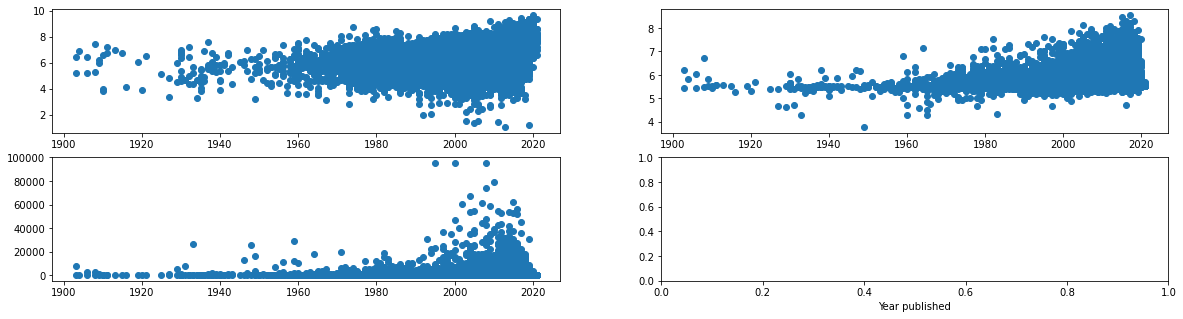

In [3]:
# Limit data to games published in or after 1900

df2 = df[df['yearpublished'] > 1900]


# Create an array of several plots

fig1, axes = plt.subplots(2,2, figsize = (20,5))
axes[0,0].scatter(df2['yearpublished'], df2['rating'], label = 'Ratings over time')
plt.xlabel('Year published')

axes[0,1].scatter(df2['yearpublished'], df2['bayes_rating'], label = 'Bayses rating over time')
axes[1,0].scatter(df2['yearpublished'], df2['usersrated'], label = 'Number of ratings over time')
#plt.legend('test')
#plt.xlabel('Year published')

plt.show

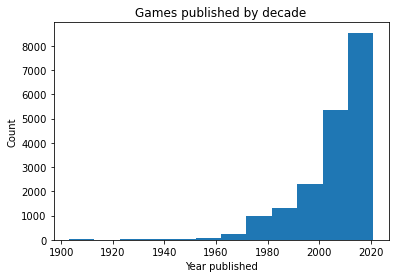

In [27]:
# Graph 1: Histogram showing games published each year focusing on games post 1900


# filter out extremely old games to see the trend in recent years

df2 = df[df['yearpublished'] > 1900]


# create a histogram of the data setting bins so there is one decade per bin (12)

plt.hist(df2['yearpublished'], bins = 12)


# add labels and title to graph
plt.title('Games published by decade')
plt.xlabel('Year published')
plt.ylabel('Count')

plt.show()

This histogram shows us just how quickly the game industry is picking up speed. It is clear from the histogram that many times more games have been published in the past 5 decades than in the decades before. It is also important to note that this data is showing a significant trend in more games being published each decade. This would lead us to expect more games to be published between 2021 and 2030 than from 2011 to 2020.

While an increase from 2021 to 2030 may be expected, it is hard to know with this data if and when the trend could level out. 

We should avoid concluding why game publications have increased in recent decades as there could be many factors contributing to this change. Some possible factors include the following:

1. Easier ability to produce and publish your own game with tools like kickstarter
2. More exposure to various game mechanics leading to more people designing their own games
3. More interest in the hobby overall and therefore a need for more games
4. More free time for people to indulge in games causing a greater demand for them

Further analysis of other factors could help narrow down the reasons for the trend but we can clearly conclude that game publications have increased significantly each decade since 1960. 

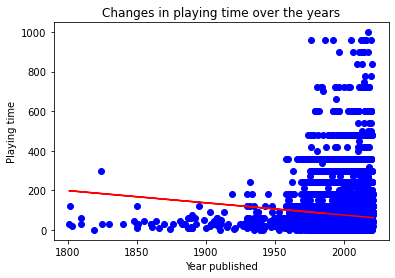

In [24]:
# Graph 2: Scatter plot of year published compared to playing time with regression line


# filter out extremely long games to see the true relationship

df2 = df[df['playingtime'] < 1000]


# filter out extremely old games to see the trend in recent years

df2 = df2[df2['yearpublished'] > 1800]


# establish variables

x = df2['yearpublished']
y = df2['playingtime']


# create a scatterplot

plt.scatter(x, y, color = 'blue')


# find  the slope (m) and intercept (b) of linear regression line

m, b = np.polyfit(x, y, 1)


# add regression line to scatterplot in different color

plt.plot(x, m*x+b, color = 'red')


# add labels and title to graph

plt.xlabel('Year published')
plt.ylabel('Playing time')
plt.title('Changes in playing time over the years')

plt.show()

This visual shows how misleading scatter plots can be when they have too much data. At first glance, it appears that average play time is increasing in recent years. The regression line shows that this is not true. The vast number of games published in recent years with low playing times counteracts the games with increased playing times that have also been published recently. 

Without adding the regression line it would be easy to think playing time is increasing but from the regression line, it is clear that playing time is actually degreasing recently. 

We can accurately conclude that more games with playing times over 500 minutes have been published in the past 50 years than in the previous 150 years but this does not speak to the trend in average playing time for all games published. 

In [28]:
# Graph 3: Average minimum and maximum player count by year of publication for games published since 1900


# calculate the average player count by year published and store to plot

min_averages = df2.groupby(by = 'yearpublished')['minplayers'].mean()
max_averages = df2.groupby(by = 'yearpublished')['maxplayers'].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

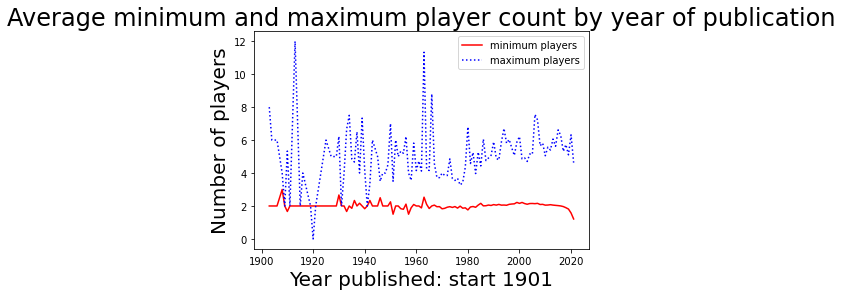

In [29]:
# Plot both the minimum and maximum average player count by year

plt.plot(min_averages, color = 'red', label = 'minimum players')
plt.plot(max_averages, ':', color = 'blue', label = 'maximum players')


# Show legend

plt.legend()


# Add labels

plt.xlabel('Year published: start 1901', fontsize = 20)
plt.ylabel('Number of players', fontsize = 20)
plt.title('Average min and max player count by year of publication', fontsize = 24)


# Show plot

plt.show

This graph show several things. First, we can see that there is much more variation in maximum player count than minimum player count. The highest average minimum player count is only 3 whereas the highest average maximum player count is 12. 

The minimum line (red) shows an interesting trend in recent years of decreasing minimum player count. This could be due to more single player variations of games being produced pulling down the overall average. In general, it seems the average minimum player count is trending downward in the past few years.

On the other hand, the maximum line(blue) shows that the max player count does not show a clear and decisive pattern. Based on what we can see, it seems the average is moving up slightly. Further analysis would be needed to draw any definitive conclusion about the trend in maximum players. 

## Write a conclusion that summarizes your findings.

These questions and visualizations leave room for further analysis. We can see that there are several trends revealed from the data but we cannot identify any concrete factors that are contributing to those trends. Looking at additional factors and sorting the data in different ways would allow more insight into the initial trends identified. 